In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load Excel dataset
df = pd.read_excel("/content/drive/MyDrive/ML_Lab/bbc_dataset.xlsx")

# Display first few rows
df.head()

,text,label
0,Ad sales boost Time Warner profit Quarterly pr...,business
1,Dollar gains on Greenspan speech The dollar ha...,business
2,Yukos unit buyer faces loan claim The owners o...,business
3,High fuel prices hit BA's profits British Airw...,business
4,Pernod takeover talk lifts Domecq Shares in UK...,business


Number of samples: 2225
Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']


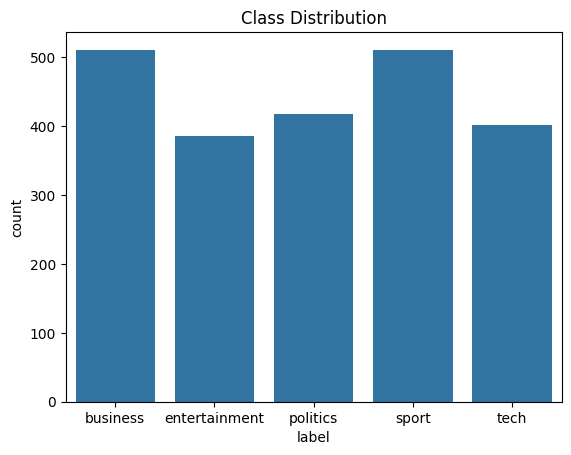

In [9]:
print("Number of samples:", len(df))
print("Classes:", df['label'].unique())

# Class distribution
sns.countplot(x="label", data=df)
plt.title("Class Distribution")
plt.show()

In [12]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return " ".join([w for w in text.split() if w not in stop_words])

df["clean_text"] = df["text"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df.head()

,text,label,clean_text
0,Ad sales boost Time Warner profit Quarterly pr...,business,ad sales boost time warner profit quarterly pr...
1,Dollar gains on Greenspan speech The dollar ha...,business,dollar gains greenspan speech dollar hit highe...
2,Yukos unit buyer faces loan claim The owners o...,business,yukos unit buyer faces loan claim owners embat...
3,High fuel prices hit BA's profits British Airw...,business,high fuel prices hit bas profits british airwa...
4,Pernod takeover talk lifts Domecq Shares in UK...,business,pernod takeover talk lifts domecq shares uk dr...


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"])

In [23]:
# Expanded keyword list across categories
keywords = [
    # Business
    "market", "stock", "bank", "economy", "finance", "trade", "growth",
    # Politics
    "election", "government", "minister", "policy", "parliament", "law",
    # Sport
    "football", "cricket", "tennis", "match", "team", "goal", "tournament",
    # Tech
    "technology", "computer", "internet", "software", "ai", "digital", "innovation",
    # Entertainment
    "film", "music", "movie", "actor", "actress", "award", "theatre"
]

# Function to extract keyword counts
def extract_keyword_features(texts, keywords):
    features = []
    for text in texts:
        words = text.split()
        counts = [words.count(kw) for kw in keywords]
        features.append(counts)
    return np.array(features)

# Generate keyword features
X_train_keywords = extract_keyword_features(X_train, keywords)
X_test_keywords = extract_keyword_features(X_test, keywords)

print("Keyword feature shape:", X_train_keywords.shape)

Keyword feature shape: (1780, 34)


In [24]:
from collections import Counter

def keyword_frequency_by_label(df, keywords):
    # Initialize counts
    label_keyword_counts = {label: Counter() for label in df["label"].unique()}

    # Count keyword occurrences per label
    for _, row in df.iterrows():
        words = row["clean_text"].split()
        counts = Counter(words)
        for kw in keywords:
            if kw in counts:
                label_keyword_counts[row["label"]][kw] += counts[kw]

    # Convert to DataFrame
    freq_df = pd.DataFrame(label_keyword_counts).fillna(0).astype(int)
    return freq_df

# Run on your dataset
freq_df = keyword_frequency_by_label(df, keywords)

# Show top keyword frequencies per label
print(freq_df.sort_index())

            business  entertainment  politics  sport  tech
actor              1            198         2      0     3
actress            0            158         0      0     0
ai                 0              1         0      2     5
award              4            233         3     17    22
bank             316             13         8      0    22
computer           8              5         3      0   299
cricket            0              0         1      3     0
digital            2             39         1      0   373
economy          352              1        87      0     2
election          34              0       565      1    13
film               9            732         8      1    84
finance           80              3        28      1     2
football          18              7        10    125    13
goal               4              2         4    124    18
government       298             31       644      4    46
growth           384              5        20      0    

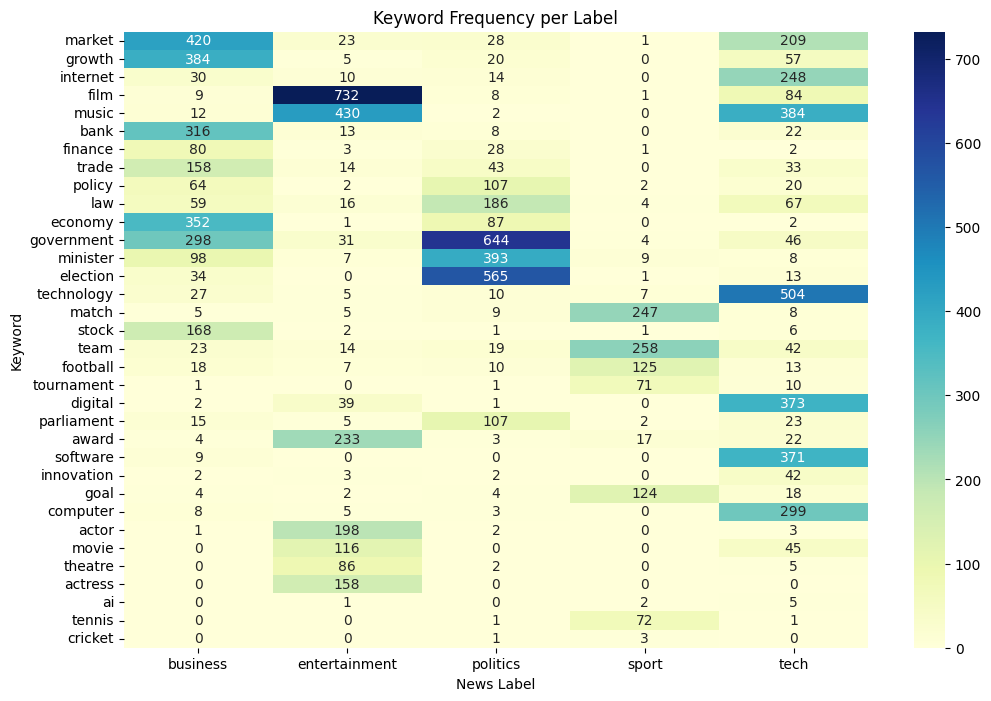

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


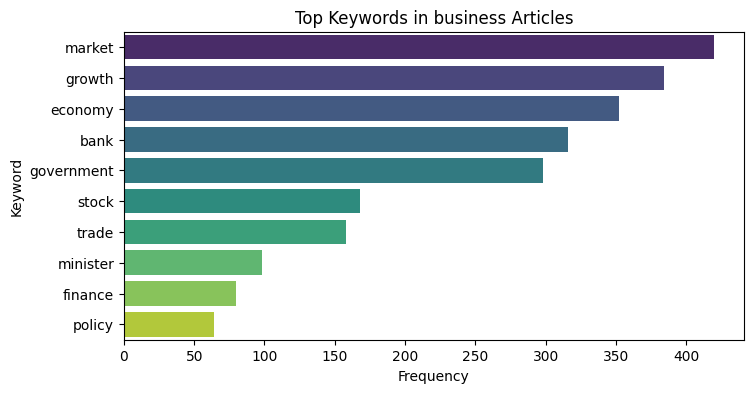

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


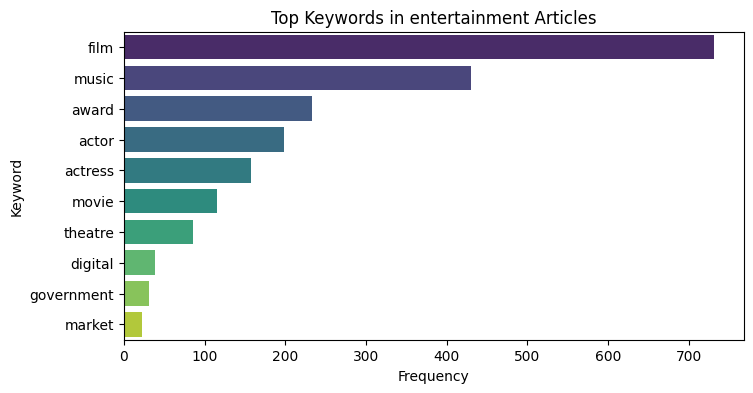

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


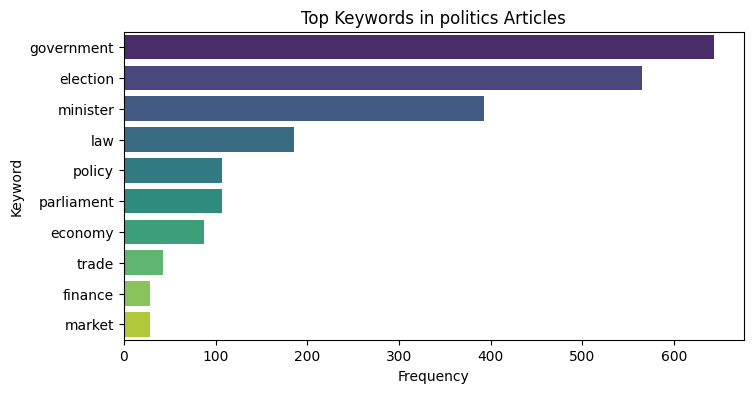

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


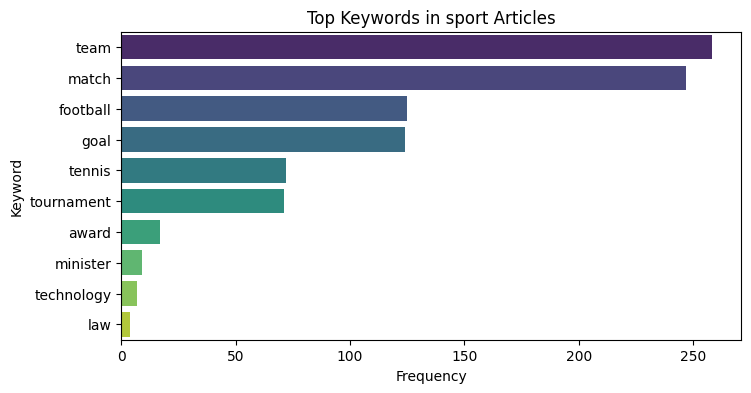

/tmp/ipython-input-2872255100.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


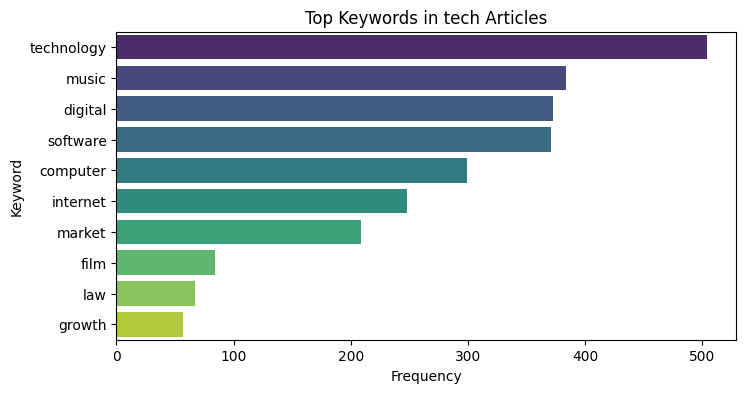

In [25]:
# -------------------------------
# Heatmap of keyword frequencies
# -------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(freq_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Keyword Frequency per Label")
plt.xlabel("News Label")
plt.ylabel("Keyword")
plt.show()

# -------------------------------
# Bar chart: Top keywords per label
# -------------------------------
for label in df["label"].unique():
    top_keywords = freq_df[label].sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")
    plt.title(f"Top Keywords in {label} Articles")
    plt.xlabel("Frequency")
    plt.ylabel("Keyword")
    plt.show()

In [26]:
from scipy.sparse import hstack

# Define vectorizers
bow_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform BoW + TF-IDF
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Combine (BoW + TF-IDF + Keywords)
X_train_combined = hstack([X_train_bow, X_train_tfidf, X_train_keywords])
X_test_combined = hstack([X_test_bow, X_test_tfidf, X_test_keywords])

print("Final feature shape:", X_train_combined.shape)

Final feature shape: (1780, 10034)



 Training Logistic Regression...
--- Logistic Regression Report ---
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       102
entertainment       0.99      1.00      0.99        77
     politics       0.98      0.96      0.97        84
        sport       0.99      1.00      1.00       102
         tech       1.00      0.96      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



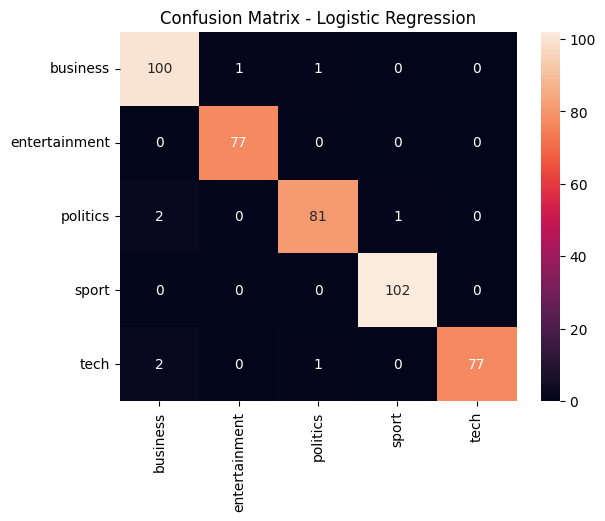


 Training Naive Bayes...
--- Naive Bayes Report ---
               precision    recall  f1-score   support

     business       1.00      0.96      0.98       102
entertainment       1.00      1.00      1.00        77
     politics       0.97      0.99      0.98        84
        sport       1.00      0.99      1.00       102
         tech       0.96      1.00      0.98        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445



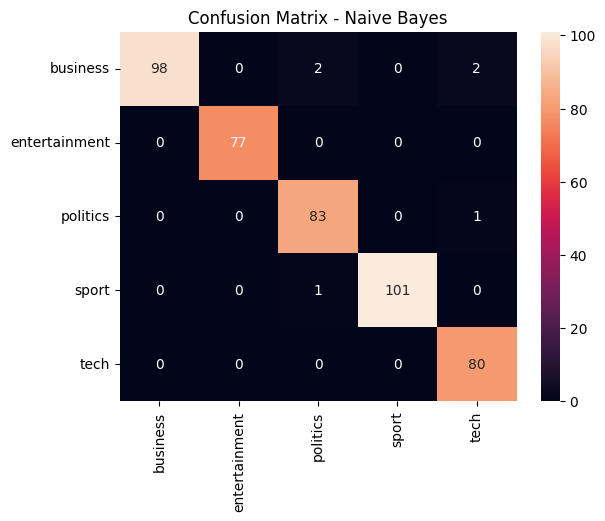


 Training Linear SVM...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--- Linear SVM Report ---
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       102
entertainment       0.97      1.00      0.99        77
     politics       0.98      0.98      0.98        84
        sport       0.99      0.99      0.99       102
         tech       1.00      0.97      0.99        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



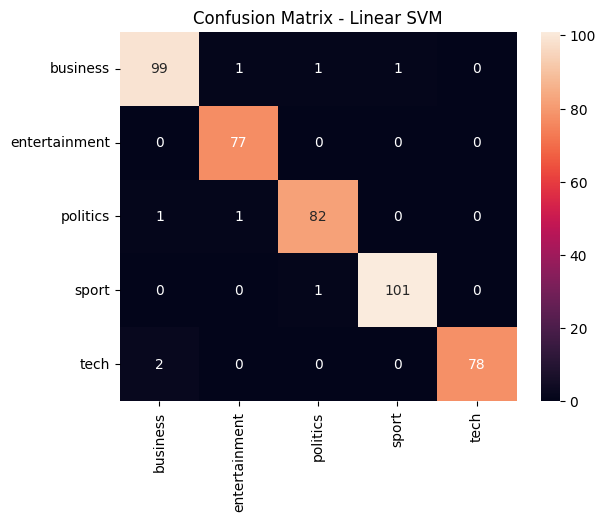


 Training Decision Tree...
--- Decision Tree Report ---
               precision    recall  f1-score   support

     business       0.87      0.83      0.85       102
entertainment       0.88      0.84      0.86        77
     politics       0.79      0.85      0.82        84
        sport       0.85      0.88      0.87       102
         tech       0.87      0.84      0.85        80

     accuracy                           0.85       445
    macro avg       0.85      0.85      0.85       445
 weighted avg       0.85      0.85      0.85       445



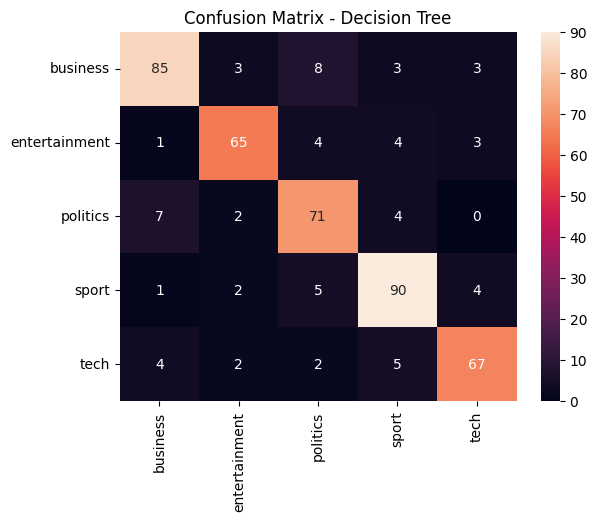


 Training Random Forest...
--- Random Forest Report ---
               precision    recall  f1-score   support

     business       0.95      0.96      0.96       102
entertainment       0.96      1.00      0.98        77
     politics       0.97      0.93      0.95        84
        sport       0.99      0.99      0.99       102
         tech       0.97      0.97      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



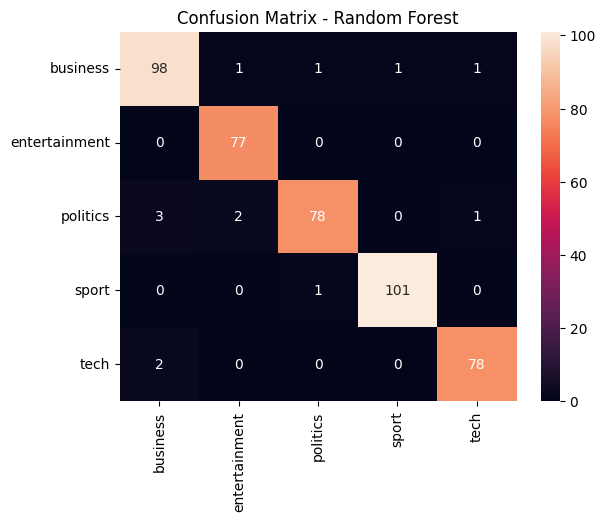

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_combined, y_train)
    preds = model.predict(X_test_combined)

    print(f"--- {name} Report ---")
    print(classification_report(y_test, preds))

    # Store results
    results[name] = classification_report(y_test, preds, output_dict=True)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


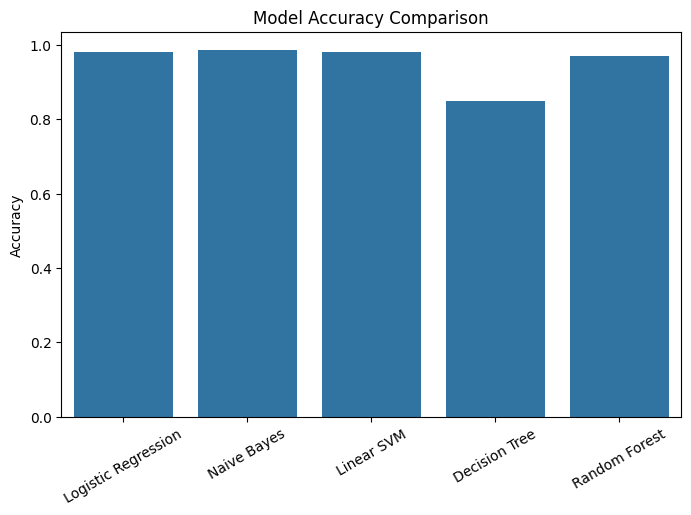

In [28]:
accuracy_scores = {name: results[name]["accuracy"] for name in results}

plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
print("\nTraining Logistic Regression...")
lr_model.fit(X_train_combined, y_train)
lr_preds = lr_model.predict(X_test_combined)

print("--- Logistic Regression Report ---")
print(classification_report(y_test, lr_preds))


Training Logistic Regression...
--- Logistic Regression Report ---
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       102
entertainment       0.99      1.00      0.99        77
     politics       0.98      0.96      0.97        84
        sport       0.99      1.00      1.00       102
         tech       1.00      0.96      0.98        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [30]:
# --------------------------------
# Predict Category for New Article
# --------------------------------

def predict_news_category(article, model, bow_vectorizer, tfidf_vectorizer, keywords):
    import re
    import numpy as np

    # Preprocess text
    stop_words = set(stopwords.words("english"))
    def clean_text(text):
        text = text.lower()
        text = re.sub(r"[^a-z\s]", "", text)
        return " ".join([w for w in text.split() if w not in stop_words])

    clean_article = clean_text(article)

    # Feature extraction
    # BoW
    bow_feat = bow_vectorizer.transform([clean_article])
    # TF-IDF
    tfidf_feat = tfidf_vectorizer.transform([clean_article])
    # Keyword frequency
    def extract_keyword_features(texts, keywords):
        features = []
        for text in texts:
            words = text.split()
            counts = [words.count(kw) for kw in keywords]
            features.append(counts)
        return np.array(features)

    keyword_feat = extract_keyword_features([clean_article], keywords)

    # Combine features
    from scipy.sparse import hstack
    combined_feat = hstack([bow_feat, tfidf_feat, keyword_feat])

    # Predict
    prediction = model.predict(combined_feat)

    return prediction[0]

# -----------------------------
# Example usage:
# -----------------------------
new_article = "After missing two straight matches with a right thigh injury, Messi converted a penalty in the 77th minute to pull Inter level at 1-1 then combined with Jordi Alba to put the hosts ahead in the 88th. Telasco Segovia added a third in injury time as Miami returned to the final of the Leagues Cup, the cross-border competition featuring teams from Major League Soccer and Mexico's Liga-MX. Inter won it in 2023, Messi's first season in MLS. They will face reigning MLS Cup champions Los Angeles Galaxy or Seattle Sounders in Sunday's final. Orlando will play in a third-place game, and the top three finishers in the tournament earn berths in the 2026 CONCACAF Champions Cup. In a high-energy first half, Croatia's Marco Pasalic silenced the crowd at Miami's Chase Stadium with a goal in first-half added time. Luis Muriel slipped a pass into the area and Maximiliano Falcon's attempt to clear it instead saw the ball deflect back to Pasalic, who rifled a left-footed shot into the net. Inter players appealed saying the ball hit Pasalic's arm but VAR confirmed the goal. Orlando, who had twice humbled their cross-state rivals this season, continued to stymie Inter in the second half. Luis Suarez forced a save from Orlando keeper Pedro Gallese while Messi twice threatened in the area only to find himself swamped in a sea of defenders. Inter coach Javier Mascherano was visibly frustrated as he watched from the stands, having received a red card during the quarter-final win over Tigres UANL. Orlando lost some momentum in the 59th minute when Guatemalan referee Walter Lopez denied them a penalty shout after Sergio Busquets' foul on Ivan Angulo. And the momentum shifted irrevocably Miami's way in the 74th minute when substitute Tadeo Allende drew a foul in the box. David Brekalo's challenge included a tug on Allende's jersey and earned him a second yellow card. He departed as Messi went to the spot, the Argentine great firing past Gallese into the lower right corner of the net. Eight-time Ballon d'Or winner Messi sparked joyous celebrations with his second goal 11 minutes later. Orlando had won two prior matches against Miami this season by a combined 7-1 margin, including a 4-1 rout earlier this month."
predicted_label = predict_news_category(new_article, lr_model, bow_vectorizer, tfidf_vectorizer, keywords)
print(f"Predicted News Category: {predicted_label}")


Predicted News Category: sport
